In [1]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import os
import pickle
import xarray
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy
import datetime
from ll_xy import lonlat_to_xy
import matplotlib.pyplot as plt
import kuka_tools as kt
from scipy.stats import binned_statistic


In [8]:
dir = '../../data/rothera/netcdfs/20230901'

In [9]:
listfiles = os.listdir(dir)
listfiles

ku_files = sorted([f for f in listfiles if 'Ku-Scat' in f])
ka_files = sorted([f for f in listfiles if 'Ka-Scat' in f])

ku_files

['kuka_stare_decon_Ku-Scat20230901-184720.nc',
 'kuka_stare_decon_Ku-Scat20230901-185221.nc',
 'kuka_stare_decon_Ku-Scat20230901-185721.nc']

644
132
30


Text(0, 0.5, 'y distance (m)')

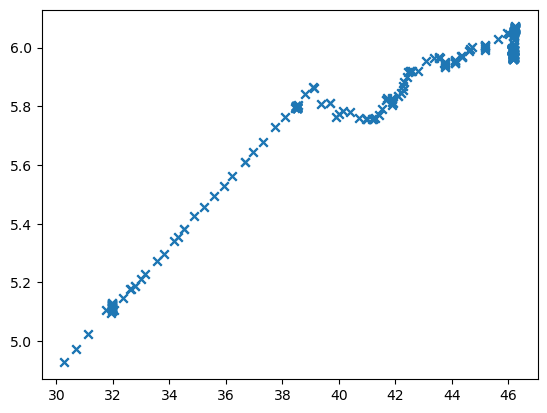

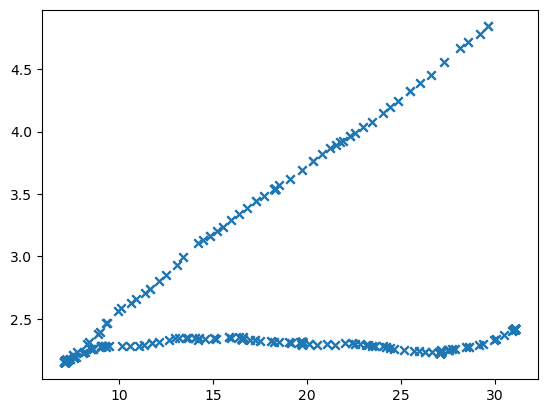

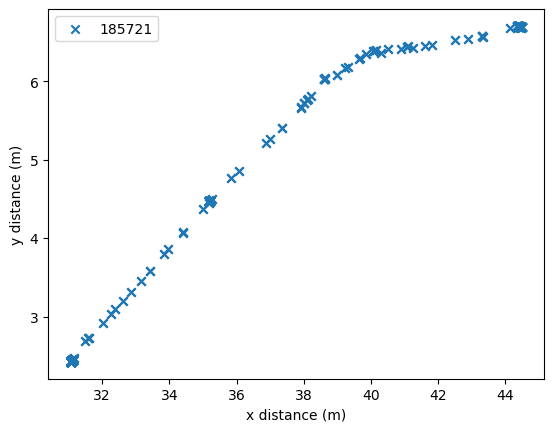

In [10]:

x,y=kt.plot_pos(ku_files[0],dir,plot=False)

x0 = -2300414.994491106; y0 = 923485.871699531

xy_dict = {}

for f in ku_files:

    x,y = kt.plot_pos(f,dir,x0=x0,y0=y0)

    print(np.argmin(x))

    xy_dict[f] = (x,y)
    
plt.legend()
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')


644


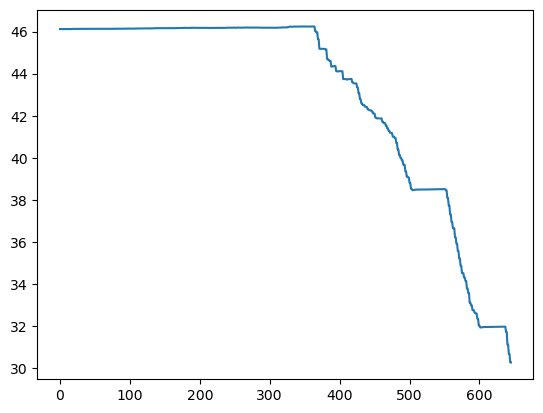

132


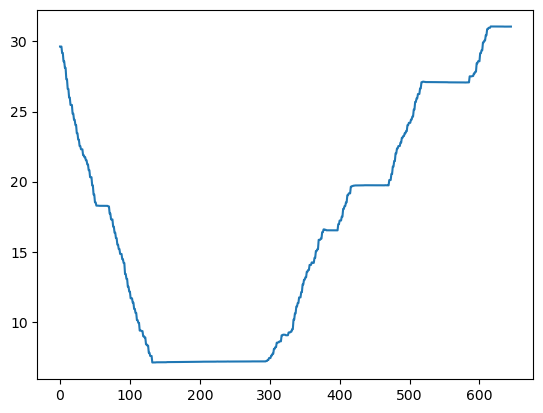

In [13]:
for f in ku_files[0:2]:
    x,y = xy_dict[f]
    print(np.argmin(x))
    plt.plot(x)
    plt.show()
# plt.xlim(580,610)    

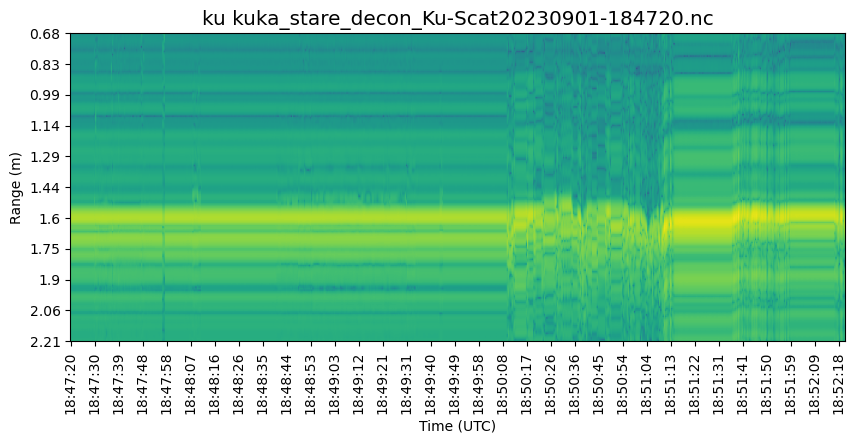

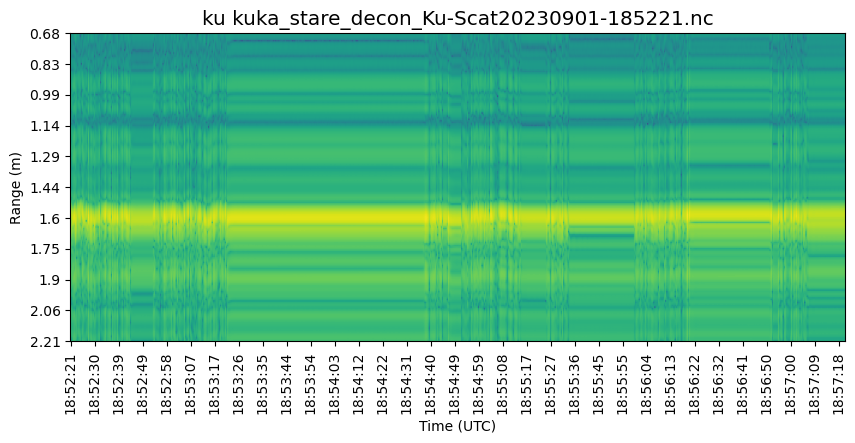

In [14]:
for f in ku_files[0:2]:
    kt.plot_file(f,'ku',dir)
    

In [15]:
foi = ku_files[0]
x,y=xy_dict[foi]
d = Dataset(f'{dir}/{foi}')
d

range = np.array(d['range'])

time_offset_s=0
times = np.array([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(x))+datetime.timedelta(seconds=int(time_offset_s)) for x in d['start_time']])

# mintime = kt.get_time_index(datetime.datetime(2023,9,1,18,54,38),times)
# maxtime = kt.get_time_index(datetime.datetime(2023,9,1,18,57,8),times)

mintime=0
maxtime=-1

x_ = 0; y_ = 0

along_track1 = np.sqrt((x-x_)**2 + (y-y_)**2)


nrcs1 = kt.get_nrcs(d,'ku')

# plt.plot(along_track[mintime:maxtime],nrcs['vv'][mintime:maxtime])
# bs = binned_statistic(along_track[mintime:maxtime],nrcs['vv'][mintime:maxtime],
#                       statistic='mean',bins=np.arange(0,26.1,0.5))

# plt.ylabel('NRCS',fontsize='x-large')
# plt.xlabel('Distance Along Track (mW)',fontsize='x-large')
# # plt.ylim(0,20)
# # plt.xlim(0,30)

# plt.show()

# bin_centres = np.arange(0.25,26.01,0.5)

# plt.plot(bin_centres,bs[0])

# thresh=25

# mean = np.nanmean(bs[0][bin_centres<thresh])

# plt.plot([0,thresh],[mean,mean],color='k',ls='--')

# print(mean)

# plt.show()


In [16]:
foi = ku_files[1]
x,y=xy_dict[foi]
d = Dataset(f'{dir}/{foi}')
d

range = np.array(d['range'])

time_offset_s=0
times = np.array([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(x))+datetime.timedelta(seconds=int(time_offset_s)) for x in d['start_time']])

# mintime = kt.get_time_index(datetime.datetime(2023,9,1,18,54,38),times)
# maxtime = kt.get_time_index(datetime.datetime(2023,9,1,18,57,8),times)

mintime=0
maxtime=132

x_ = 0; y_ = 0

along_track2 = np.sqrt((x-x_)**2 + (y-y_)**2)[mintime:maxtime]


nrcs2 = kt.get_nrcs(d,'ku')

In [17]:
np.array(d['cross_tilt']).shape

(646,)

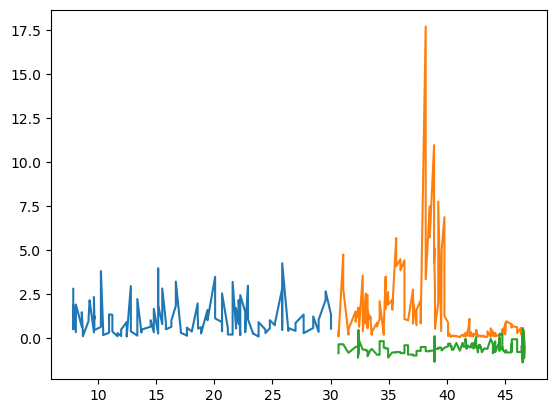

In [18]:
nrcsvv2 = nrcs2['vv'][mintime:maxtime]

plt.plot(along_track2,nrcsvv2)
plt.plot(along_track1,nrcs1['vv'])
plt.plot(along_track1,np.array(d['cross_tilt']))

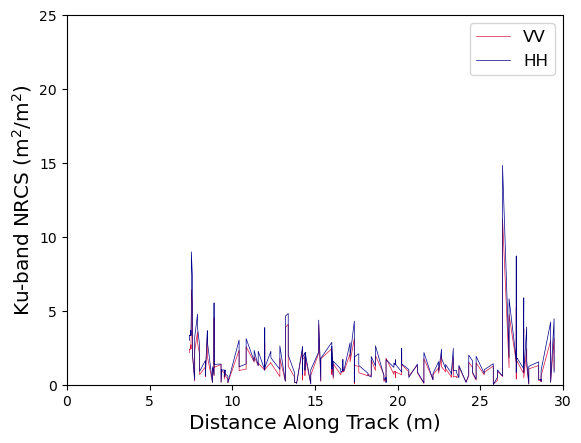

In [19]:
foi = ku_files[1]
d = Dataset(f'{dir}/{foi}')
d

range = np.array(d['range'])

time_offset_s=0
times = np.array([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(x))+datetime.timedelta(seconds=int(time_offset_s)) for x in d['start_time']])

# mintime = kt.get_time_index(datetime.datetime(2023,9,1,18,54,38),times)
# maxtime = kt.get_time_index(datetime.datetime(2023,9,1,18,57,8),times)

mintime=132
# mintime=122
maxtime=610

x_ = 0; y_ = 0

along_track = np.sqrt((x-x_)**2 + (y-y_)**2)

xdiff = np.diff(x)
ydiff = np.diff(y)
speed = np.sqrt(np.square(xdiff)+np.square(ydiff))
speed=list(speed)+[0]

nrcs = pd.DataFrame(kt.get_nrcs(d,'ku'))
nrcs['along_track']=along_track
nrcs['speed']=speed


nrcs_return = nrcs.iloc[mintime:maxtime]

nrcs_return = nrcs_return.sort_values('along_track').reset_index()

nrcs_return = nrcs_return[nrcs_return['along_track']<30]

plt.plot(nrcs_return['along_track'],
         nrcs_return['vv'],
         label='VV',
         lw=0.5,
         color='crimson')

plt.plot(nrcs_return['along_track'],
         nrcs_return['hh'],
         label='HH',
         lw=0.5,
         color='darkblue')

plt.ylabel('Ku-band NRCS (m$^2$/m$^2$)',fontsize='x-large')
plt.xlabel('Distance Along Track (m)',fontsize='x-large')



# plt.axvspan(start_along_track,end_along_track,color='grey',alpha=0.2)
plt.ylim(0,25)
plt.xlim(0,30)
plt.legend(fontsize='large')
plt.show()

In [20]:
pickle.dump(nrcs_return,open('../../data/pickles/NRCS_901_KU.p','wb'))

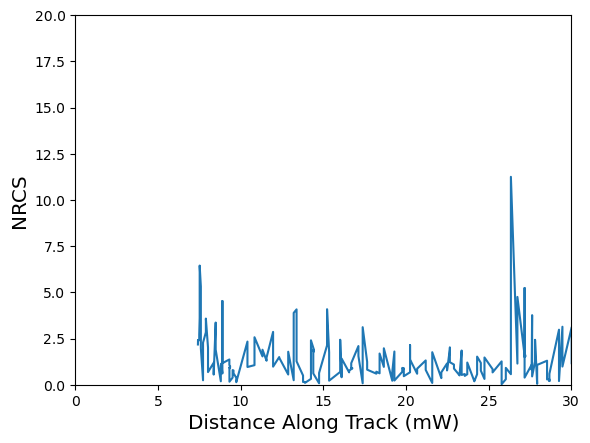

1.2630394865453225


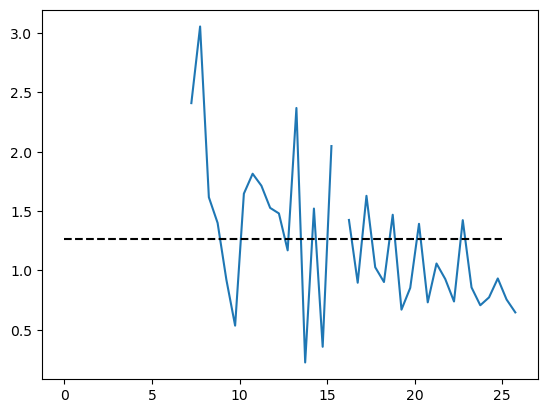

In [21]:
nrcs = pd.DataFrame(kt.get_nrcs(d,'ku'))

# import pickle
# pickle_file = '../data/pickles/901_trans.p'
# pickle.dump( (along_track,nrcs), open(pickle_file,'wb'))

plt.plot(along_track[mintime:maxtime],nrcs['vv'][mintime:maxtime])
bs = binned_statistic(along_track[mintime:maxtime],nrcs['vv'][mintime:maxtime],
                      statistic='mean',bins=np.arange(0,26.1,0.5))

plt.ylabel('NRCS',fontsize='x-large')
plt.xlabel('Distance Along Track (mW)',fontsize='x-large')
plt.ylim(0,20)
plt.xlim(0,30)

plt.show()

bin_centres = np.arange(0.25,26.01,0.5)

plt.plot(bin_centres,bs[0])

thresh=25

mean = np.nanmean(bs[0][bin_centres<thresh])

plt.plot([0,thresh],[mean,mean],color='k',ls='--')

print(mean)

plt.show()